Import libraries -- may need to revisit to remove unused ones

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


<div class="span4 alert alert-success">
** QUESTION HERE***


HERE I read the file. But when I work on the DF manupulation sometimes I make a mistake, and as we all know creating duplicate dfs don't work because if you change one all will change.

What do you recommend here? How do I back-up? Do I go all the way to the beginning? Do I write a csv file?

</div>

In [263]:
df=pd.read_csv("autos.csv",  encoding='cp1252'  )
#df1=pd.read_csv("autos.csv",  encoding='cp1252'  )
#df2=pd.read_csv("autos.csv",  encoding='cp1252'  )
#df3=pd.read_csv("autos.csv",  encoding='cp1252'  )
#df4=pd.read_csv("autos.csv",  encoding='cp1252'  )
df.head()
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [264]:
df.model=df.model.str.upper()
df.name=df.name.str.upper()
df.brand=df.brand.str.upper()

In [267]:
df[(df.brand=="SONSTIGE_AUTOS")&(df.model.isna()==False)]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen


<div class="span4 alert alert-success">
** QUESTION HERE***


HERE I read the file. But when I work on the DF manupulation sometimes I make a mistake, and as we all know creating duplicate dfs don't work because if you change one all will change.

What do you recommend here? How do I back-up? Do I go all the way to the beginning? Do I write a csv file?

</div>

In [181]:
df.name=df.name.str.replace("_", " ")
df.seller.unique()
df.seller[df.seller=="PRIVAT"] = "PRIVATE"
df.seller[df.seller=="GEWERBLICH"] = "DEALER"


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [142]:
#namecol=df.name.str.split(" ")
##namecol.pop(0)
##liste
##[]
##namecol.apply(brnd for brnd in liste for row in namecol for elmnt in row if brnd in elmnt )
#namecol=namecol[:100]
#namecol2=df.name[:600]
##namecol2

In [70]:
#def namecol_list_old(nm,lst):
#    results=[]
#    for row in nm: 
#        #print(row)
#        for elmnt in row: 
#            #print(elmnt)
#            if elmnt in lst and elmnt.isalpha()==True  : 
#                results.append(elmnt)
#                
#                break
#            else: 
#                 if (row[0] != row[-1]) and (elmnt==row[-1]):# elmnt.isalpha()==True  
#                    results.append("NaN")
#                #break
#           
#  
#    return (results)
#
#    

In [182]:
def namecol_list(nm,lst):
    results=[]
    #nm.split(" ")
    
    for row in nm:
        if "" in row:
            row.remove("")
        #print(row)
        found=False
        for elmnt in row: 
            #if elmnt.isalpha==True:
            #print(elmnt)
                for brnd in lst:


                     if found!=True and brnd == elmnt: 
                        results.append(elmnt)
                        #print(elmnt, "zzzzzzzzzzzzz")
                        found=True
                        break
                        #break  #except:
                     else: 
                            if found==False and elmnt==row[-1] and brnd==lst[-1]: 
                                #print ("ccccccccccccc", elmnt,"son eleman",row[-1], "son araba marka", brnd,lst[-1])
                                results.append("NaN")
                                #print(elmnt + "wwwwwwwwww")
                                found=True
                                break

# break may only occur syntactically nested in a for or while loop, but not nested in a function or class 
# definition within that loop.

# It terminates the nearest enclosing loop, skipping the optional else clause if the loop has one.

# If a for loop is terminated by break, the loop control target keeps its current value.

# When break passes control out of a try statement with a finally clause, 
# that finally clause is executed before really leaving the loop.           
  
    return (results)

In [259]:
new_col = namecol_list(df.name.str.split(" "),liste)
#len(new_col)-df.name[df.name.isnull()==False].count()
#liste.append("BMW")
#new_col


In [144]:
#df["new_models"]=namecol_list(df.name.str.split(" "),models)
#namecol1.str.rstrip("")
#namecol1.str.replace("","a")
#namecol1=namecol1.str.join(' ')
#namecol_list(namecol1,liste)
#namecol1=namecol1.str.split(" ")
#namecol1[402].remove("")
#namecol1#.remove("")

#namecol2=df.name[:10000].str.split(" ")
#namecol2=namecol1[:]
#ccc=namecol_list(namecol2,models)
#aaa
#len(aaa)
#aaa#namecol2

#len(bbb)-len(df.name)
#namecol2.drop_duplicates(keep="first")
#namecol2
#len(ccc)
#df=df[sorted(df.columns)]
#df[df.brand.isna()==True]
#df.name=df.name.str.capitalize()
#df



<div class="span4 alert alert-success">
Here filtering starts on top and bottom level.
Pretty easy to tell there will be no cars for 0 or "1 €", or under "100€" --- these are fake advertisements just to draw attention.
Also, there are ultra luxurious brands, and another filter was written to see and filter out cars that are not ultra luxurious but ultra pricey.

I am plannig to working on using str.split and isin method, which will look nicer. I don't know if it is really necessary.

</div>

In [183]:
#LEVEL 1
df=df.drop(columns=["offerType","postalCode","nrOfPictures","dateCreated","lastSeen"])
df=df.drop(df[(df.brand =='SONSTIGE_AUTOS') & (df.model.isna() == True)].index)
df=df.drop(df[df.price==0].index)
df=df.drop(df[df.price==1].index)
df=df.drop(df[df.price<=100].index)
df=df.drop(df[df.price==2147483647].index)
search1=df[(df.brand.isin(["PORSCHE","FERRARI","MASERATI"])==False) &  (df.name.str.contains("FERRARI")==False)
          & (df.name.str.contains("MASERATI")==False) & (df.name.str.contains("PORSCHE")==False)
          & (df.price>=2000000)]
search1#### DİKKAT!!!
df=df.drop(search1.index)

search2=df[(df.brand.isin(["PORSCHE","FERRARI","MASERATI"])==False) &  (df.name.str.contains("FERRARI")==False)
          & (df.name.str.contains("MASERATI")==False) & (df.name.str.contains("PORSCHE")==False)
          & (df.name.str.contains("LAMBORGHINI")==False) & (df.name.str.contains("ASTON MARTIN")==False)
          & (df.name.str.contains("MUSEUM")==False) & (df.name.str.contains("JAGUAR")==False)
          & (df.name.str.contains("ROLLS ROYCE")==False)  & (df.name.str.contains("AMG")==False)
          &(df.name.str.contains("DETOMASO")==False) &(df.name.str.contains("BMW Z8")==False)
          &(df.name.str.contains("MCLAREN")==False)
          & (df.price>=200000) & (df.yearOfRegistration > 1980)]
search2 #### DİKKAT!!!
df=df.drop(search2.index)
search3=df[(df.brand.isin(["PORSCHE","FERRARI","MASERATI"])==False) &  (df.name.str.contains("FERRARI")==False)
          & (df.name.str.contains("MASERATI")==False) & (df.name.str.contains("PORSCHE")==False)
          & (df.name.str.contains("LAMBORGHINI")==False) & (df.name.str.contains("ASTON MARTIN")==False)
          & (df.name.str.contains("MUSEUM")==False) & (df.name.str.contains("JAGUAR")==False)
          & (df.name.str.contains("ROLLS ROYCE")==False)  & (df.name.str.contains("AMG")==False)
          &(df.name.str.contains("DETOMASO")==False) &(df.name.str.contains("BMW Z8")==False)
          &(df.name.str.contains("MCLAREN")==False)
          & (df.price>=100000) & (df.yearOfRegistration > 1980)]
search3#### DİKKAT!!!
df=df.drop(search3.index)



In [ ]:
### LEVEL 2
#df=df.drop(df[df.price==0].index)
#df=df.drop(df[df.price==1].index)
#df=df.drop(df[df.price<=100].index)
#df=df.drop(df[df.price==2147483647].index)
### LEVEL 3

#df=df.drop(columns=["offerType","postalCode","nrOfPictures","dateCreated","lastSeen"])
#df=df.drop(df[df.price==0].index)
#df=df.drop(df[df.price==1].index)
#df=df.drop(df[df.price<=100].index)
#df=df.drop(df[df.price==2147483647].index)
#search=df[df.price>0.8*1e6]
###df=df.drop(search.index)
#search

**** CAUTION HERE*****


<div class="span4 alert alert-success">
Here the top filtering ends, but are these the results I want?
I cleaned all fake data, but there are outliers still....Do I want them?
</div>

In [72]:
###df.head().notRepairedDamage.isnull().sum()
##
###sns.scatterplot(data=np.log(df.price)*10,  alpha=0.3)
##sns.scatterplot(data=df.price,  alpha=0.3)
##

In [184]:
df.shape
df.columns
print(df.info())
print(df['vehicleType'].value_counts(dropna=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353784 entries, 0 to 371527
Data columns (total 15 columns):
dateCrawled            353784 non-null object
name                   353784 non-null object
seller                 353784 non-null object
price                  353784 non-null int64
abtest                 353784 non-null object
vehicleType            321731 non-null object
yearOfRegistration     353784 non-null int64
gearbox                337978 non-null object
powerPS                353784 non-null int64
model                  339425 non-null object
kilometer              353784 non-null int64
monthOfRegistration    353784 non-null int64
fuelType               325992 non-null object
brand                  353784 non-null object
notRepairedDamage      289866 non-null object
dtypes: int64(5), object(10)
memory usage: 43.2+ MB
None
limousine     92852
kleinwagen    76977
kombi         65636
NaN           32053
bus           29488
cabrio        22001
coupe         17936
suv    

In [ ]:
df.loc[df.price==df.price.max()]

In [ ]:
#df.loc[df.price>=0.2*1e8]
#df=df.drop(df[df.price>=0.2*1e8].index)
#sns.scatterplot(data=df.price, alpha=0.3)

#df.loc[df.price>=0.9*1e7]
#df=df.drop(df[df.price>=0.9*1e7].index)
#sns.scatterplot(data=df.price, alpha=0.3)

df.loc[df.price>=1.9*1e6]
#df=df.drop(df[df.price>=0.9*1e7].index)
#sns.scatterplot(data=df.price, alpha=0.3)
#search=df[df.price>=1500000]
#search.sort_values(by="price")

(array([ 316.,  221., 1728.,  539., 2285.,  388., 2321.,  410., 3265.,
         136.,  224., 2740.,  468., 2966.,  161., 2234.,  232., 6550.,
         102.,  176., 2881.,  567., 4658.,  156., 3343.,  355., 4279.,
          95., 3400.,  113.,  730., 4736.,  124., 3101.,  182., 4440.,
          78., 2910.,  123., 4851.]),
 array([101.  , 123.45, 145.9 , 168.35, 190.8 , 213.25, 235.7 , 258.15,
        280.6 , 303.05, 325.5 , 347.95, 370.4 , 392.85, 415.3 , 437.75,
        460.2 , 482.65, 505.1 , 527.55, 550.  , 572.45, 594.9 , 617.35,
        639.8 , 662.25, 684.7 , 707.15, 729.6 , 752.05, 774.5 , 796.95,
        819.4 , 841.85, 864.3 , 886.75, 909.2 , 931.65, 954.1 , 976.55,
        999.  ]),
 <a list of 40 Patch objects>)

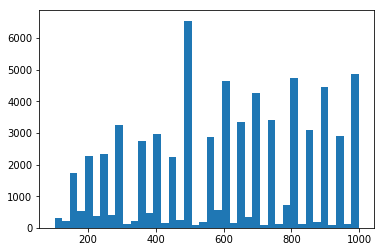

In [212]:
plt.clf()
plt.hist(df.price[df.price<1000], bins=40)

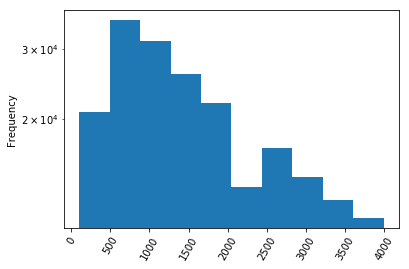

In [214]:
df['price'][df.price<0.4e4].plot(kind='hist', rot=60, logx=False, logy=True)

In [226]:
df[(df.price>=100)&(df.price<1000)].count()


dateCrawled            57757
name                   57757
seller                 57757
price                  57757
abtest                 57757
vehicleType            47390
yearOfRegistration     57757
gearbox                52690
powerPS                57757
kilometer              57757
monthOfRegistration    57757
fuelType               48503
brand                  57757
notRepairedDamage      38556
model                  57757
dtype: int64

In [ ]:
#df.name[2]
######
####def namesplit(x,list,change):
#########    """checks if dataframe element has list element in it"""
#######    namesplitted = x.split(" ")
######    for i in range len(namesplitted):
#####        if namesplitted[i] in liste:
####            x.brand = 

In [187]:
brands=df.brand.unique()
brands=pd.DataFrame(brands)
liste=list(brands[0].str.upper())



In [ ]:
#df.name[(df.brand =='sonstige_autos') & (df.model.isna() == True)]
#df=df.drop(df[(df.brand =='sonstige_autos') & (df.model.isna() == True)].index)
#df=df.drop(df[(df.brand.isin(["porsche","ferrari","maserati"])==False) & (df.price>=900000)].index)
#
#
#sil1=df[(df.brand.isin(["porsche","ferrari","maserati"])==False) & (df.price>=500000) & (df.yearOfRegistration>2000)]
#df=df.drop(df[(df.brand.isin(["porsche","ferrari","maserati"])==False) & (df.price>=500000) & (df.yearOfRegistration>2000)].index)
#
#
#sil2=df[(df.brand.isin(["porsche","ferrari","maserati"])==False) & (df.price>=200000) & (df.yearOfRegistration>1000)]
#sil2
#
#sil3=df[(df.price<1000) & (df.yearOfRegistration>2010)]
#sil3
#
#df=df.drop(df[(df.price<1000) & (df.yearOfRegistration>2010)].index)
#
#df = df.reset_index(drop=True)
#df
#
#sil4=df[(df.price<1000) & (df.yearOfRegistration>2005)]
#sil4
#
##One too shui fooooo
##df=df.drop(df[df.name=="One too shui fooooo"].index)
#
#df[(df.brand.isin(["porsche","ferrari","maserati"])==False) & (df.price>=100000) & (df.yearOfRegistration>1000)]
##df.iloc[181036] ---- sil

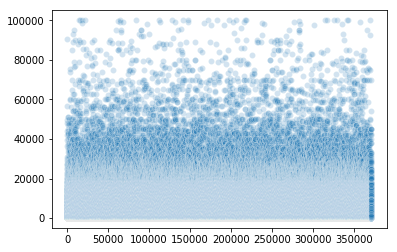

In [146]:
sns.scatterplot(data=df.price[df.price<=0.01e7],  alpha=0.2)

In [ ]:
#search=df[df.price>=1500000]
#search.sort_values(by="price")
#search=df[(df.brand.isin(["porsche","ferrari","maserati"])==False) & (df.price>=190000)]
#search

In [188]:
models=df.model.unique()
models=pd.DataFrame(models)
models.sort_values(by=0)

#models=list(models[0])
models=models[0].str.upper()
#print(liste)
models=list(models.dropna())
models

['GOLF',
 'GRAND',
 'FABIA',
 '3ER',
 '2_REIHE',
 'C_MAX',
 '3_REIHE',
 'PASSAT',
 'NAVARA',
 'KA',
 'POLO',
 'TWINGO',
 'A_KLASSE',
 'SCIROCCO',
 '5ER',
 'MERIVA',
 'AROSA',
 'ANDERE',
 'C4',
 'CIVIC',
 'TRANSPORTER',
 'PUNTO',
 'E_KLASSE',
 'CLIO',
 'KADETT',
 'KANGOO',
 'ONE',
 'FORTWO',
 '1ER',
 'B_KLASSE',
 'SIGNUM',
 'ASTRA',
 'A8',
 'JETTA',
 'FIESTA',
 'C_KLASSE',
 'MICRA',
 'VITO',
 'SPRINTER',
 '156',
 'ESCORT',
 'FORESTER',
 'XC_REIHE',
 'SCENIC',
 'A4',
 'A1',
 'INSIGNIA',
 'COMBO',
 'FOCUS',
 'TT',
 'CORSA',
 'A6',
 'JAZZ',
 'OMEGA',
 'SLK',
 '7ER',
 '80',
 '147',
 'GLK',
 '100',
 'Z_REIHE',
 'SPORTAGE',
 'SORENTO',
 'V40',
 'IBIZA',
 'MUSTANG',
 'EOS',
 'TOURAN',
 'GETZ',
 'A3',
 'ALMERA',
 'MEGANE',
 'LUPO',
 'R19',
 'ZAFIRA',
 'CADDY',
 'MONDEO',
 'CORDOBA',
 'COLT',
 'IMPREZA',
 'VECTRA',
 'BERLINGO',
 'M_KLASSE',
 'TIGUAN',
 'I_REIHE',
 'ESPACE',
 'SHARAN',
 '6_REIHE',
 'PANDA',
 'UP',
 'SEICENTO',
 'CEED',
 '5_REIHE',
 'YETI',
 'OCTAVIA',
 'MII',
 'RX_REIHE',
 '6ER',

In [163]:



#brand_modelsxxx={'80':, '147', 'Glk', '100', , 'V40',  , 'R19'   , 'M_klasse', , 'Espace', '5_reihe',,
# 'Mii', 'Rx_reihe', '6er', 'Modus', 'Spider', 'Cuore', 'S_max',
#'A2', 'X_reihe', 'Galaxy', '1_reihe', 'Sl', 'Roomster', 'Q5', 'Kaefer', 'Santa', '500'
#'Exeo', '159' ,  'Lanos' ,  '5er',  'Arosa', 'Andere',
#,  ,  'Sandero', 'Note',   'One', 'Fortwo', '1er',  'Signum',
#     , '156',   'Xc_reihe',  ,  'Combo', , 'Tt'  'Slk', '7er',
#'900', 'Cherokee', 'Clubman', , '601', 'Boxster',, 'Swift', 'Rav', 'Picanto', 'Kalos',
#'Superb', 'Alhambra', '911', 'M_reihe', 'Roadster', ,
#, 'Galant', 'Justy', '90', 'Sirion', 'Crossfire', 'Agila', 'Cr_reihe', 'V50', 'Mx_reihe', 'Discovery',
#'C_reihe', 'Cc', , 'Fusion', 'Forfour', 'Cl', '300c', 'Q3', 'Spark'
#, 'S_type', 'Altea', 'Voyager',  'Bravo',  'Antara', 'Q7', 'Citigo', 'Jimny',
#'Cx_reihe', 'Wrangler', 'Lybra', 'Freelander', 'S60', 'Nubira', 'Vivaro', 'Lodgy',
#'850', 'Serie_2', 'Charade', 'Croma', , 'Gl', 'Move', '9000', 'V60', 'Aveo','200', '145',
#'B_max', 'Delta', 'Terios', 'Materia', 'Kalina',  'I3'
#   'Alfa_romeo':['Kappa', 'Elefantino', 'Musa'],
#             'Audi':[ 'A3', 'A5','A8',  'A1','A4' , 'A6',],  
#             'Bmw':['Z_reihe', '3er'], 
#             'Chevrolet':[, 'Matiz'], 
#             'Chrysler':["Grand Voyager", 'Ptcruiser'], 
#             'Citroen':['C1','C3', 'Berlingo', 'C2', 'C4',  'C5'], 
#             'Dacia':['Logan', 'Duster'], 
#             'Daewoo':[, 'Matiz'], 
#             'Daihatsu':[], 
#             'Fiat':['Punto','Fiesta', 'Panda', 'Seicento', 'Doblo','Ducato', 'Stilo'],
#             'Ford':['Focus', 'C_max','Escort','Ka', 'Transit', 'Mustang', 'Kuga''Mondeo',],
#             'Honda':['Jazz','Civic', 'Accord'], 
#             'Hyundai':[, 'I_reihe', 'Tucson', 'Getz'], 
#             'Jaguar':[, 'X_type',], 
#             'Jeep': ["Grand Cherokee"], 
#             'Kia':['Carnival', 'Sportage', 'Sorento', 'Rio', 'Ceed'], 
#             'Lada':['Niva', 'Samara'],
#             'Lancia':['Ypsilon'], 
#             'Land_rover':['Discovery_sport', 'Range_rover_evoque',  'Defender', 'Range_rover_sport', 'Rangerover', 
#                           'Serie_3', 'Serie_1',],
#             'Mazda':["5_reihe", '6_reihe','3_reihe'], 
#             'Mercedes_benz':['E_klasse', 'Sprinter','A_klasse','C_klasse','Vito','B_klasse', 'Viano', 'S_klasse', 
#                              'Clk','V_klasse', 'G_klasse'],
#             'Mini':[, 'Cooper'], 
#             'Mitsubishi':['Pajero', 'Carisma', 'Colt', 'Lancer','Outlander'], 
#             'Nissan':['Micra','Almera', 'Juke', 'Qashqai', 'Primera', 'Navara', 'X_trail'],
#             'Opel':['Omega','Corsa','Insignia' ,'Astra', 'Kadett','Meriva', 'Zafira','Calibra','Vectra', 'Tigra'],
#             'Peugeot':[, '2_reihe','3_reihe', '4_reihe'], 
#             'Porsche':['Cayenne'], 
#             'Renault':['Kangoo','Clio', 'Scenic','Twingo', 'Megane', 'Laguna','Captiva'],
#             'Rover':[], 
#             'Saab':[], 
#             'Seat':['Cordoba','Toledo','Ibiza','Leon'], 
#             'Skoda':[, 'Yeti', 'Octavia','Fabia'], 
#             'Smart':[], 
#             'Subaru':['Legacy', 'Forester', 'Impreza'],
#             'Suzuki':["Grand Vitara"], 
#             'Toyota':["Corolla", "Yaris",'Auris', 'Avensis', 'Verso', 'Aygo'], 
#             'Trabant':[], 
#             'Volkswagen':['Golf','Jetta','Passat','Polo','Scirocco','Up', 'Fox', 'Beetle', 'Lupo', 'Eos', 'Touran', 'Phaeton',
#                            'Touareg','Tiguan', 'Sharan', 'Caddy', 'Bora',  'Amarok', 'Transporter'],
#             'Volvo':[, 'V70']
#                 }

In [ ]:
#df.brand[df.model=='Terios'].unique()

In [189]:
grand_opt={'CHRYSLER':"GRAND VOYAGER", 'SUZUKI':"GRAND VITARA",'JEEP': "GRAND CHEROKEE"}
def lookupCode(code):
    return grand_opt.get(code)

In [190]:
df.model=df.model.str.upper()
df.brand=df.brand.str.upper()
df.name=df.name.str.upper()
#df.model[df1.model=="Grand"] = 
df.model[df.model=="GRAND"] = df.brand[df.model=="GRAND"].map(lookupCode)
dftrim1.model[dftrim1.model=="GRAND"] = dftrim1.brand[df.model=="GRAND"].map(lookupCode)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [191]:
dftrim1=df.head(100)
dftrim1

,dateCrawled,name,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,2016-03-24 11:52:17,GOLF 3 1.6,privat,480,test,NaN,1993,manuell,0,GOLF,150000,0,benzin,VOLKSWAGEN,NaN
1,2016-03-24 10:58:45,A5 SPORTBACK 2.7 TDI,privat,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,AUDI,ja
2,2016-03-14 12:52:21,"JEEP GRAND CHEROKEE ""OVERLAND""",privat,9800,test,suv,2004,automatik,163,GRAND CHEROKEE,125000,8,diesel,JEEP,NaN
3,2016-03-17 16:54:04,GOLF 4 1 4 3TÜRER,privat,1500,test,kleinwagen,2001,manuell,75,GOLF,150000,6,benzin,VOLKSWAGEN,nein
4,2016-03-31 17:25:20,SKODA FABIA 1.4 TDI PD CLASSIC,privat,3600,test,kleinwagen,2008,manuell,69,FABIA,90000,7,diesel,SKODA,nein
5,2016-04-04 17:36:23,BMW 316I E36 LIMOUSINE BASTLERFAHRZEUG EX...,privat,650,test,limousine,1995,manuell,102,3ER,150000,10,benzin,BMW,ja
6,2016-04-01 20:48:51,PEUGEOT 206 CC 110 PLATINUM,privat,2200,test,cabrio,2004,manuell,109,2_REIHE,150000,8,benzin,PEUGEOT,nein
8,2016-04-04 23:42:13,FORD C MAX TITANIUM 1 0 L ECOBOOST,privat,14500,control,bus,2014,manuell,125,C_MAX,30000,8,benzin,FORD,NaN
9,2016-03-17 10:53:50,VW GOLF 4 5 TUERIG ZU VERKAUFEN MIT ANHAENGERK...,privat,999,test,kleinwagen,1998,manuell,101,GOLF,150000,0,NaN,VOLKSWAGEN,NaN
10,2016-03-26 19:54:18,MAZDA 3 1.6 SPORT,privat,2000,control,limousine,2004,manuell,105,3_REIHE,150000,12,benzin,MAZDA,nein


In [ ]:
#namecol.apply(brnd for brnd in liste for row in namecol for elmnt in row if brnd in elmnt )

In [260]:
def colbrmdl(brands,models):
    out={}
    for mdl in  models:
        
        hits= df.brand[df.model==mdl].unique()
            
        for hit in hits:
            if mdl not in ["MISSING VALUE","ANDERE" ]:
            
            
            
          
                out.setdefault(hit, []).append(mdl) 
        
    return out


In [261]:
brandsmodels={}
brandsmodels=colbrmdl(brands,models)
brandsmodels

{'VOLKSWAGEN': ['GOLF',
  'PASSAT',
  'POLO',
  'SCIROCCO',
  'TRANSPORTER',
  'JETTA',
  'EOS',
  'TOURAN',
  'LUPO',
  'CADDY',
  'TIGUAN',
  'SHARAN',
  'UP',
  'FOX',
  'BEETLE',
  'TOUAREG',
  'KAEFER',
  'PHAETON',
  'CC',
  'BORA',
  'AMAROK'],
 'SKODA': ['FABIA', 'YETI', 'OCTAVIA', 'ROOMSTER', 'SUPERB', 'CITIGO'],
 'BMW': ['3ER',
  '5ER',
  '1ER',
  '7ER',
  'Z_REIHE',
  '6ER',
  'X_REIHE',
  'M_REIHE',
  'I3'],
 'PEUGEOT': ['2_REIHE', '3_REIHE', '5_REIHE', '1_REIHE', '4_REIHE'],
 'FORD': ['C_MAX',
  'KA',
  'FIESTA',
  'ESCORT',
  'FOCUS',
  'MUSTANG',
  'MONDEO',
  'S_MAX',
  'GALAXY',
  'TRANSIT',
  'KUGA',
  'FUSION',
  'B_MAX'],
 'MAZDA': ['3_REIHE',
  '6_REIHE',
  '5_REIHE',
  'RX_REIHE',
  '1_REIHE',
  'MX_REIHE',
  'CX_REIHE'],
 'NISSAN': ['NAVARA',
  'MICRA',
  'ALMERA',
  'PRIMERA',
  'JUKE',
  'QASHQAI',
  'X_TRAIL',
  'NOTE'],
 'RENAULT': ['TWINGO',
  'CLIO',
  'KANGOO',
  'SCENIC',
  'MEGANE',
  'R19',
  'ESPACE',
  'MODUS',
  'LAGUNA'],
 'MERCEDES_BENZ': ['A_KLASS

In [195]:
df["model"]=df["model"].fillna("MISSING VALUE")
#dftrim.head()
#a.isalnum()

In [196]:
df

,dateCrawled,name,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,2016-03-24 11:52:17,GOLF 3 1.6,privat,480,test,NaN,1993,manuell,0,GOLF,150000,0,benzin,VOLKSWAGEN,NaN
1,2016-03-24 10:58:45,A5 SPORTBACK 2.7 TDI,privat,18300,test,coupe,2011,manuell,190,MISSING VALUE,125000,5,diesel,AUDI,ja
2,2016-03-14 12:52:21,"JEEP GRAND CHEROKEE ""OVERLAND""",privat,9800,test,suv,2004,automatik,163,GRAND CHEROKEE,125000,8,diesel,JEEP,NaN
3,2016-03-17 16:54:04,GOLF 4 1 4 3TÜRER,privat,1500,test,kleinwagen,2001,manuell,75,GOLF,150000,6,benzin,VOLKSWAGEN,nein
4,2016-03-31 17:25:20,SKODA FABIA 1.4 TDI PD CLASSIC,privat,3600,test,kleinwagen,2008,manuell,69,FABIA,90000,7,diesel,SKODA,nein
5,2016-04-04 17:36:23,BMW 316I E36 LIMOUSINE BASTLERFAHRZEUG EX...,privat,650,test,limousine,1995,manuell,102,3ER,150000,10,benzin,BMW,ja
6,2016-04-01 20:48:51,PEUGEOT 206 CC 110 PLATINUM,privat,2200,test,cabrio,2004,manuell,109,2_REIHE,150000,8,benzin,PEUGEOT,nein
8,2016-04-04 23:42:13,FORD C MAX TITANIUM 1 0 L ECOBOOST,privat,14500,control,bus,2014,manuell,125,C_MAX,30000,8,benzin,FORD,NaN
9,2016-03-17 10:53:50,VW GOLF 4 5 TUERIG ZU VERKAUFEN MIT ANHAENGERK...,privat,999,test,kleinwagen,1998,manuell,101,GOLF,150000,0,NaN,VOLKSWAGEN,NaN
10,2016-03-26 19:54:18,MAZDA 3 1.6 SPORT,privat,2000,control,limousine,2004,manuell,105,3_REIHE,150000,12,benzin,MAZDA,nein


In [ ]:
#def fillmodel(model,brand,name):
#    for mdl in model:
#list['Renault Twingo 1.2 16V Aut.']        
#'Golf' in brandsmodels.get("Volkswagen")  
#'a' in z.keys()

In [197]:
df=df.drop(df[(df.brand =='SONSTIGE_AUTOS')].index)

In [262]:
df[df.brand=='SONSTIGE_AUTOS']

,dateCrawled,name,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,model


In [268]:
def fill_value(row,lookupDict):
    mdlist=[]
    
    if row.model in ["MISSING VALUE","ANDERE"]:#== "MISSING VALUE": #or row.model=="ANDERE":
    
        mdlist=lookupDict.get(row.brand)
   
        for mdl in mdlist:
            
            if mdl in list(row["name"].split(" ")):
                
                return mdl

In [118]:
brandsmodels

{'VOLKSWAGEN': ['GOLF',
  'PASSAT',
  'POLO',
  'SCIROCCO',
  'TRANSPORTER',
  'JETTA',
  'EOS',
  'TOURAN',
  'LUPO',
  'CADDY',
  'TIGUAN',
  'SHARAN',
  'UP',
  'FOX',
  'BEETLE',
  'TOUAREG',
  'KAEFER',
  'PHAETON',
  'CC',
  'BORA',
  'AMAROK'],
 'SKODA': ['FABIA', 'YETI', 'OCTAVIA', 'ROOMSTER', 'SUPERB', 'CITIGO'],
 'BMW': ['3ER',
  '5ER',
  '1ER',
  '7ER',
  'Z_REIHE',
  '6ER',
  'X_REIHE',
  'M_REIHE',
  'I3'],
 'PEUGEOT': ['2_REIHE', '3_REIHE', '5_REIHE', '1_REIHE', '4_REIHE'],
 'FORD': ['C_MAX',
  'KA',
  'FIESTA',
  'ESCORT',
  'FOCUS',
  'MUSTANG',
  'MONDEO',
  'S_MAX',
  'GALAXY',
  'TRANSIT',
  'KUGA',
  'FUSION',
  'B_MAX'],
 'MAZDA': ['3_REIHE',
  '6_REIHE',
  '5_REIHE',
  'RX_REIHE',
  '1_REIHE',
  'MX_REIHE',
  'CX_REIHE'],
 'NISSAN': ['NAVARA',
  'MICRA',
  'ALMERA',
  'PRIMERA',
  'JUKE',
  'QASHQAI',
  'X_TRAIL',
  'NOTE'],
 'RENAULT': ['TWINGO',
  'CLIO',
  'KANGOO',
  'SCENIC',
  'MEGANE',
  'R19',
  'ESPACE',
  'MODUS',
  'LAGUNA'],
 'MERCEDES_BENZ': ['A_KLASS

In [41]:
df.model.fillna("MISSING VALUE")

0                  GOLF
1         MISSING VALUE
2                 GRAND
3                  GOLF
4                 FABIA
5                   3ER
6               2_REIHE
8                 C_MAX
9                  GOLF
10              3_REIHE
11               PASSAT
12               PASSAT
13               PASSAT
14               NAVARA
15                   KA
16                 POLO
17               TWINGO
18                C_MAX
19             A_KLASSE
20             SCIROCCO
21                  5ER
22               MERIVA
23                AROSA
24               ANDERE
25                  5ER
26                   C4
27                CIVIC
28          TRANSPORTER
29                PUNTO
30             E_KLASSE
              ...      
371497            ASTRA
371498           VECTRA
371499            CORSA
371500             GOLF
371501          VOYAGER
371502               A4
371503            JUSTY
371504         C_KLASSE
371505            ASTRA
371506             GOLF
371507          

In [256]:
#df.model[1]!=np.nan
#np.nan
#str()=="nan"
#df.model[1]
#bool(np.isnan(df.model[2]))


df[(df.results=="ANDERE")]

AttributeError: 'DataFrame' object has no attribute 'results'

In [199]:
df["sonuc"]=df.apply (lambda row: fill_value(row,brandsmodels),axis=1)

In [201]:
#dftrim1.sonuçlar=dftrim1.sonuçlar+dftrim1.model
df.sonuc.fillna(value=df.model, inplace=True)

In [207]:
#df=df.drop(columns="model")
df.rename(columns={"sonuc":"model"}, inplace=True)

In [ ]:
#df.columns
df=df[[['dateCrawled', 'name','brand' , 'price','model' , 'vehicleType','yearOfRegistration' ,'monthOfRegistration','kilometer'
       , 'gearbox', 'powerPS', 'notRepairedDamage' , 'fuelType',
       , ,,
       'model']]]'seller'   'abtest'

In [246]:
####Suggest deletion of these rows


df.notRepairedDamage[df.notRepairedDamage=='nein'].count()
df[df.powerPS==0].count()
df[df.gearbox.isna()==True]
df[df.model=='MISSING VALUE']

,dateCrawled,name,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,model
83,2016-04-03 12:56:45,BASTLER FAHRZEUG MIT REST TUEV,privat,350,control,kleinwagen,1997,manuell,54,150000,3,NaN,FIAT,ja,MISSING VALUE
165,2016-03-19 19:49:15,IS ALES OK,privat,500,control,kleinwagen,1999,manuell,0,150000,0,benzin,RENAULT,nein,MISSING VALUE
191,2016-03-16 15:51:08,BMW 530XD E60 EZ10/2008,privat,14000,test,limousine,2008,NaN,235,150000,0,NaN,BMW,nein,MISSING VALUE
320,2016-03-13 13:38:54,BIETE BMW 318 I KOMBI AUCH TAUSCH,privat,1600,test,kombi,1999,manuell,0,150000,6,benzin,BMW,nein,MISSING VALUE
365,2016-03-08 08:57:34,PEUGEOT 107 KLIMA,privat,5500,test,kleinwagen,2012,manuell,68,40000,12,NaN,PEUGEOT,nein,MISSING VALUE
373,2016-03-23 23:57:07,PEUGEOT F 206 MIT MOTORSCHADEN,privat,300,control,kleinwagen,2001,manuell,0,150000,5,benzin,PEUGEOT,ja,MISSING VALUE
427,2016-03-26 21:49:45,ALFA GIULIETTA 2.0 JTDM MIT QV AUSSTATTUNG,privat,13950,control,andere,2011,manuell,140,60000,11,diesel,ALFA_ROMEO,nein,MISSING VALUE
563,2016-03-15 17:43:21,TOP ZUSTAND,privat,2600,control,NaN,2005,NaN,0,125000,0,NaN,CHEVROLET,NaN,MISSING VALUE
612,2016-03-10 18:45:10,PEUGEOT 206CC QUIKSILVER BJ 2005 95.000 KM,privat,3800,test,cabrio,2005,manuell,109,100000,12,benzin,PEUGEOT,NaN,MISSING VALUE
658,2016-03-27 09:56:27,BMW E 46 CABRIO BLACK SAPHIR METALLIC FACELIFT,privat,7400,test,cabrio,2003,automatik,192,150000,8,NaN,BMW,nein,MISSING VALUE


In [251]:
brandsmodels

{'VOLKSWAGEN': ['GOLF',
  'PASSAT',
  'POLO',
  'SCIROCCO',
  'TRANSPORTER',
  'JETTA',
  'EOS',
  'TOURAN',
  'LUPO',
  'CADDY',
  'TIGUAN',
  'SHARAN',
  'UP',
  'FOX',
  'BEETLE',
  'TOUAREG',
  'KAEFER',
  'PHAETON',
  'CC',
  'BORA',
  'AMAROK'],
 'SKODA': ['FABIA', 'YETI', 'OCTAVIA', 'ROOMSTER', 'SUPERB', 'CITIGO'],
 'BMW': ['3ER',
  '5ER',
  '1ER',
  '7ER',
  'Z_REIHE',
  '6ER',
  'X_REIHE',
  'M_REIHE',
  'I3'],
 'PEUGEOT': ['2_REIHE', '3_REIHE', '5_REIHE', '1_REIHE', '4_REIHE'],
 'FORD': ['C_MAX',
  'KA',
  'FIESTA',
  'ESCORT',
  'FOCUS',
  'MUSTANG',
  'MONDEO',
  'S_MAX',
  'GALAXY',
  'TRANSIT',
  'KUGA',
  'FUSION',
  'B_MAX'],
 'MAZDA': ['3_REIHE',
  '6_REIHE',
  '5_REIHE',
  'RX_REIHE',
  '1_REIHE',
  'MX_REIHE',
  'CX_REIHE'],
 'NISSAN': ['NAVARA',
  'MICRA',
  'ALMERA',
  'PRIMERA',
  'JUKE',
  'QASHQAI',
  'X_TRAIL',
  'NOTE'],
 'RENAULT': ['TWINGO',
  'CLIO',
  'KANGOO',
  'SCENIC',
  'MEGANE',
  'R19',
  'ESPACE',
  'MODUS',
  'LAGUNA'],
 'MERCEDES_BENZ': ['A_KLASS

In [252]:
####Suggest deletion of these values

df[(df.price>=100)&(df.price<1000)].count()

dateCrawled            68584
name                   68584
seller                 68584
price                  68584
abtest                 68584
vehicleType            56851
yearOfRegistration     68584
gearbox                62913
powerPS                68584
kilometer              68584
monthOfRegistration    68584
fuelType               58147
brand                  68584
notRepairedDamage      46774
model                  68584
dtype: int64

In [257]:
df.groupby(["brand","model"]).price.mean()
df[df.model=='ANDERE']

,dateCrawled,name,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,model
24,2016-03-13 20:40:49,MERCEDES 200E TÜV 04/2016,privat,500,test,limousine,1990,manuell,118,150000,10,benzin,MERCEDES_BENZ,ja,ANDERE
38,2016-04-01 17:45:07,ABSCHLEPPWAGEN VW LT 195.000 GRUENE PLAKETTE T...,privat,11900,test,andere,2002,manuell,129,150000,11,diesel,VOLKSWAGEN,nein,ANDERE
39,2016-03-25 15:50:30,MERCEDES CAMPER D407,privat,1500,test,bus,1984,manuell,70,150000,8,diesel,MERCEDES_BENZ,nein,ANDERE
52,2016-04-04 10:57:36,VERKAUFE MEINEN KLEINEN WEGEN NEU ANSCHAFFUNG,privat,1400,control,NaN,2016,manuell,55,5000,1,NaN,HYUNDAI,NaN,ANDERE
56,2016-03-21 01:59:07,BMW 435I SPORT COUPE,privat,39600,test,coupe,2014,automatik,306,30000,7,benzin,BMW,nein,ANDERE
58,2016-03-10 20:53:19,SEAT INCA 1.9SDI LKW ZULASSUNG TÜV NEU,privat,2399,test,NaN,2018,manuell,64,125000,3,NaN,SEAT,nein,ANDERE
68,2016-03-21 12:47:55,HONDA HRV RESERVIERT!!!,privat,2100,control,suv,2000,manuell,105,150000,8,benzin,HONDA,nein,ANDERE
69,2016-03-15 09:51:05,MERCEDES BENZ 190,privat,1280,control,limousine,1992,automatik,109,150000,9,benzin,MERCEDES_BENZ,NaN,ANDERE
88,2016-03-13 19:52:34,MITSUBISHI L 400,privat,1800,control,bus,2001,manuell,87,150000,7,diesel,MITSUBISHI,nein,ANDERE
93,2016-04-02 23:25:25,SENATOR A2 3 0E 180PS CD AUSSTATTUNG.,privat,1222,control,limousine,1984,automatik,180,150000,3,benzin,OPEL,NaN,ANDERE
